In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Classified Data',index_col= 0)
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
st_scaler = StandardScaler()

In [5]:
st_scaler.fit(data.drop('TARGET CLASS',axis =1))

StandardScaler()

In [6]:
scaled_feature = st_scaler.transform(data.drop('TARGET CLASS',axis =1))

In [7]:
data_inde = pd.DataFrame(scaled_feature, columns=data.columns[:-1])

In [9]:
data_inde.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_inde, data['TARGET CLASS'], test_size= 0.3, random_state= 0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred = knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test,y_pred))

[[125  15]
 [ 16 144]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Choosing the right K value

In [22]:
error_rate =[]
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error_rate')

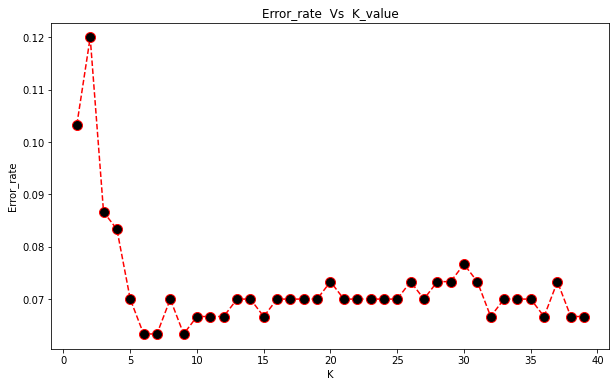

In [24]:
plt.figure(figsize= (10,6))
plt.plot(range(1,40), error_rate, color = 'red', linestyle ='dashed', marker ='o', markerfacecolor ='black', markersize =10)
plt.title('Error_rate  Vs  K_value')
plt.xlabel('K')
plt.ylabel('Error_rate')

In [26]:
# K =1

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Here we select k value = 1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Here we select k value = 1


[[128  12]
 [  9 151]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.93      0.94      0.93       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [27]:
# from the above graph we have decided that K =21 to 23 will be best suitable for our model

knn = KNeighborsClassifier(n_neighbors= 23)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Here we select K value = 23')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Here we select K value = 23


[[126  14]
 [  7 153]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       140
           1       0.92      0.96      0.94       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

